In [3]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

## Mean and variance map functions

In [4]:
def mean_map(cube):
    x = np.arange(0, cube.shape[1])
    y = np.arange(0, cube.shape[2])
    mean = np.zeros((len(x),len(y)))
    for i in x:
        for j in y:
            pix_arr=[]
            for frame in np.arange(0, cube.shape[0]):
                pix = cube[frame, i, j]
                pix_arr.append(pix)
            mean[i,j] = np.mean(pix_arr)
    return mean

def var_map(cube):
    x = np.arange(0, cube.shape[1])
    y = np.arange(0, cube.shape[2])
    var = np.zeros((len(x),len(y)))
    for i in x:
        for j in y:
            pix_arr=[]
            for frame in np.arange(0, cube.shape[0]):
                pix = cube[frame, i, j]
                pix_arr.append(pix)
            var[i,j] = np.var(pix_arr)
    return var

# DARK images (shutter on)

#### framrate = 100fps, readout-mode = CDS, gain = medium gain

## Bias correction applied

In [12]:
cube_1 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_0.05ms_baiscorr1.fit')
cube_2 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_1.00ms_baiscorr1.fit')
cube_3 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_2.00ms_baiscorr1.fit')
cube_4 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_3.00ms_baiscorr1.fit')
cube_5 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_4.00ms_baiscorr1.fit')
cube_6 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_5.00ms_baiscorr0.fit')
cube_7 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_6.00ms_baiscorr1.fit')
cube_8 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_7.00ms_baiscorr1.fit')

In [13]:
mean_1 = mean_map(cube_1)
mean_2 = mean_map(cube_2)
mean_3 = mean_map(cube_3)
mean_4 = mean_map(cube_4)
mean_5 = mean_map(cube_5)
mean_6 = mean_map(cube_6)
mean_7 = mean_map(cube_7)
mean_8 = mean_map(cube_8)

#### Mean vs. int time

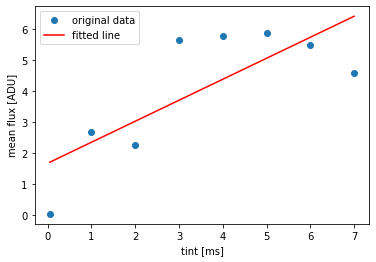

In [14]:
mean_arr = np.array([ np.median(mean_1),
                     np.median(mean_2), 
                     np.median(mean_3),
                     np.median(mean_4), 
                     np.median(mean_5), 
                     np.median(mean_6), 
                     np.median(mean_7), 
                     np.median(mean_8)])
tint = np.array([0.05, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00])
line = linregress(tint, mean_arr)
plt.plot(tint, mean_arr, 'o', label='original data')
plt.plot(tint, line.intercept + line.slope*tint, 'r', label='fitted line')
plt.ylabel('mean flux [ADU]')
plt.xlabel('tint [ms]')
plt.legend()


## Bias substraction manually

In [5]:
bias_cube = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_0.05ms_baiscorr0.fit')
raw_cube_2 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_1.00ms_baiscorr0.fit')
raw_cube_3 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_2.00ms_baiscorr0.fit')
raw_cube_4 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_3.00ms_baiscorr0.fit')
raw_cube_5 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_4.00ms_baiscorr0.fit')
raw_cube_6 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_5.00ms_baiscorr1.fit')
raw_cube_7 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_6.00ms_baiscorr0.fit')
raw_cube_8 = fits.getdata('G:/20210521/shutter_on/100fps/fps_100_tint_7.00ms_baiscorr0.fit')

#### Mean vs. int time

In [6]:
bias_img = mean_map(bias_cube)
raw_mean_1 = mean_map(bias_cube-bias_img)
raw_mean_2 = mean_map(raw_cube_2-bias_img)
raw_mean_3 = mean_map(raw_cube_3-bias_img)
raw_mean_4 = mean_map(raw_cube_4-bias_img)
raw_mean_5 = mean_map(raw_cube_5-bias_img)
raw_mean_6 = mean_map(raw_cube_6-bias_img)
raw_mean_7 = mean_map(raw_cube_7-bias_img)
raw_mean_8 = mean_map(raw_cube_8-bias_img)

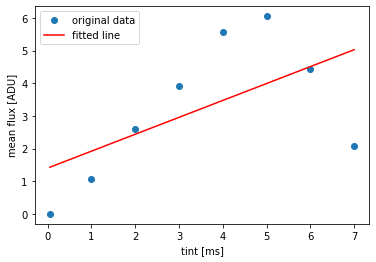

In [7]:
mean_arr = np.array([np.median(raw_mean_1),
                     np.median(raw_mean_2), 
                     np.median(raw_mean_3),
                     np.median(raw_mean_4), 
                     np.median(raw_mean_5), 
                     np.median(raw_mean_6), 
                     np.median(raw_mean_7), 
                     np.median(raw_mean_8)])
tint = np.array([0.05, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00])
line = linregress(tint, mean_arr)
plt.plot(tint, mean_arr, 'o', label='original data')
plt.plot(tint, line.intercept + line.slope*tint, 'r', label='fitted line')
plt.ylabel('mean flux [ADU]')
plt.xlabel('tint [ms]')
plt.legend()


#### Variance vs. int time

In [8]:
raw_var_1 = var_map(bias_cube-bias_img)
raw_var_2 = var_map(raw_cube_2-bias_img)
raw_var_3 = var_map(raw_cube_3-bias_img)
raw_var_4 = var_map(raw_cube_4-bias_img)
raw_var_5 = var_map(raw_cube_5-bias_img)
raw_var_6 = var_map(raw_cube_6-bias_img)
raw_var_7 = var_map(raw_cube_7-bias_img)
raw_var_8 = var_map(raw_cube_8-bias_img)

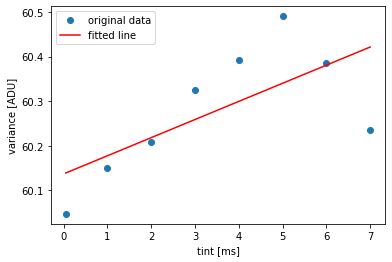

In [9]:
var_arr = np.array([np.median(raw_var_1),
                     np.median(raw_var_2), 
                     np.median(raw_var_3),
                     np.median(raw_var_4), 
                     np.median(raw_var_5), 
                     np.median(raw_var_6), 
                     np.median(raw_var_7), 
                     np.median(raw_var_8)])
tint = np.array([0.05, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00])
line = linregress(tint, var_arr)
plt.plot(tint, var_arr, 'o', label='original data')
plt.plot(tint, line.intercept + line.slope*tint, 'r', label='fitted line')
plt.ylabel('variance [ADU]')
plt.xlabel('tint [ms]')
plt.legend()
